In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
conda install keras

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\admin\anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       haa95532_0         123 KB
    certifi-2023.7.22          |  py310haa95532_0         154 KB
    keras-2.10.0               |  py310haa95532_0         1.6 MB
    keras-preprocessing-1.1.2  |     pyhd3eb1b0_0          35 KB
    openssl-1.1.1w             |       h2bbff1b_0         5.5 MB
    ------------------------------------------------------------
                                           Total:         7.4 MB

The following NEW packages will be INSTALLED:

  keras              pkgs/main/win-64::keras-2.10.0-py310haa95532_0 
  keras-preprocessi~ pkgs/main/noarch::keras-preprocessing-1.1.2-pyhd3eb1b0_0 

The following packages will be UPDATED:

  ca-certifi

In [4]:
pip install tensorflow


     -------------------------------------- 284.1/284.1 MB 4.4 MB/s eta 0:00:00
     ------------------------------------- 440.7/440.7 kB 13.9 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 11.7 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 8.2 MB/s eta 0:00:00
     ------------------------------------- 938.6/938.6 kB 15.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 430.5/430.5 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 130.2/130.2 kB ? eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 9.3 MB/s eta 0:00:00
     -------------------------------------- 182.3/

In [7]:
# data_importing
df = pd.read_csv("C:\\Users\\admin\\Downloads\\BHARAT INTERN\\NFLX.csv")
# fetching first 10 rows of dataset
df.head(10) 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
5,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400
6,2002-06-03,1.080000,1.149286,1.076429,1.128571,1.128571,3151400
7,2002-06-04,1.135714,1.140000,1.110714,1.117857,1.117857,3105200
8,2002-06-05,1.110714,1.159286,1.107143,1.147143,1.147143,1531600
9,2002-06-06,1.150000,1.232143,1.148571,1.182143,1.182143,2305800


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100
5043,2022-06-03,200.139999,202.949997,198.050003,198.979996,198.979996,7181700


In [9]:
df.shape

(5044, 7)

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [12]:
# check for non-null values
df.count()

Date         5044
Open         5044
High         5044
Low          5044
Close        5044
Adj Close    5044
Volume       5044
dtype: int64

In [13]:
#checking for the null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [26]:
#Check for required columns
df = df[['Date','Open','Close']] 

# converting object dtype of date column to datetime dtype
 
df['Date'] = pd.to_datetime(df['Date'], format='%d%b%Y') 

df.set_index('Date',drop=True,inplace=True) 
df.head(10)

,Open,Close
Date,,
2002-05-23,1.156429,1.196429
2002-05-24,1.214286,1.210000
2002-05-28,1.213571,1.157143
2002-05-29,1.164286,1.103571
2002-05-30,1.107857,1.071429
2002-05-31,1.078571,1.076429
2002-06-03,1.080000,1.128571
2002-06-04,1.135714,1.117857
2002-06-05,1.110714,1.147143


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

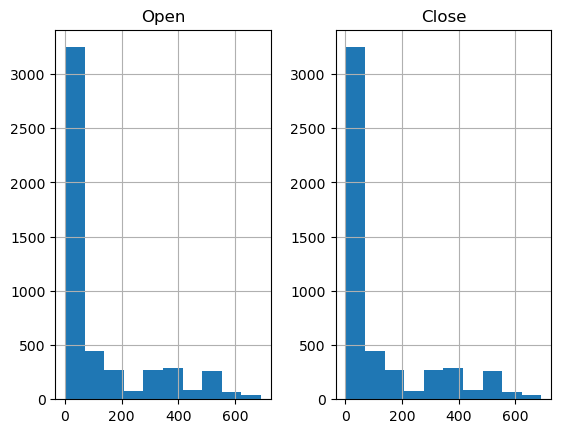

In [27]:
df.hist()

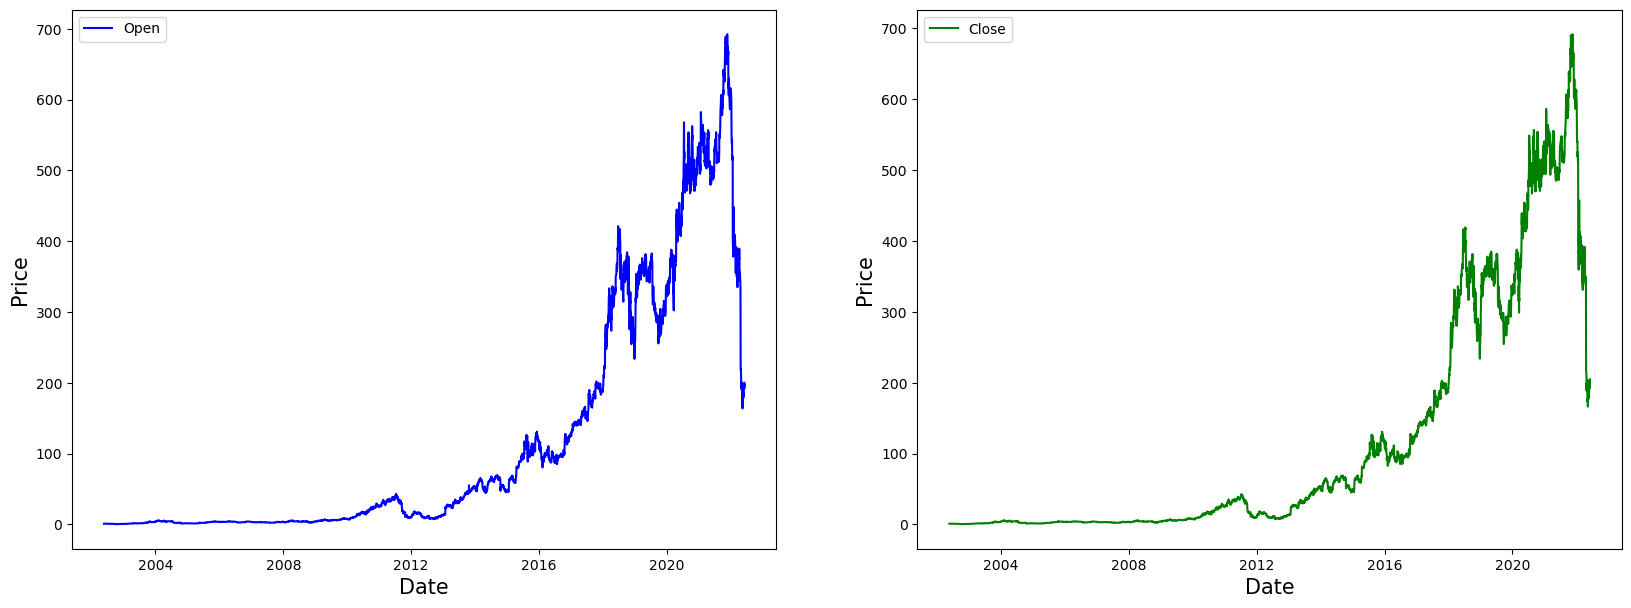

In [28]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [29]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2002-05-23,0.001125,0.001191
2002-05-24,0.001209,0.001211
2002-05-28,0.001208,0.001134
2002-05-29,0.001137,0.001057
2002-05-30,0.001055,0.001010
2002-05-31,0.001013,0.001018
2002-06-03,0.001015,0.001093
2002-06-04,0.001095,0.001078
2002-06-05,0.001059,0.001120


In [30]:
df.tail(10)

,Open,Close
Date,,
2022-05-20,0.268063,0.269019
2022-05-23,0.268468,0.270595
2022-05-24,0.262470,0.260325
2022-05-25,0.259985,0.271159
2022-05-26,0.268959,0.276323
2022-05-27,0.278641,0.281806
2022-05-31,0.282962,0.285060
2022-06-01,0.286604,0.278508
2022-06-02,0.276951,0.296126


In [31]:
training_size = round(len(df) * 0.75) 

In [32]:
training_size

3783

In [33]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((3783, 2), (1261, 2))

In [34]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [35]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((3733, 50, 2), (3733, 2), (1211, 50, 2), (1211, 2))

In [36]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=25))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2800      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 2)                 52        
                                                                 
Total params: 7952 (31.06 KB)
Trainable params: 7952 (31.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)


Epoch 1/100
117/117 [==============================] - 12s 49ms/step - loss: 1.8425e-04 - mean_absolute_error: 0.0070 - val_loss: 0.0079 - val_mean_absolute_error: 0.0623
Epoch 2/100
117/117 [==============================] - 7s 63ms/step - loss: 2.8373e-05 - mean_absolute_error: 0.0031 - val_loss: 0.0069 - val_mean_absolute_error: 0.0601
Epoch 3/100
117/117 [==============================] - 7s 64ms/step - loss: 2.7848e-05 - mean_absolute_error: 0.0031 - val_loss: 0.0051 - val_mean_absolute_error: 0.0521
Epoch 4/100
117/117 [==============================] - 4s 35ms/step - loss: 2.3863e-05 - mean_absolute_error: 0.0029 - val_loss: 0.0065 - val_mean_absolute_error: 0.0640
Epoch 5/100
117/117 [==============================] - 4s 35ms/step - loss: 2.3674e-05 - mean_absolute_error: 0.0028 - val_loss: 0.0037 - val_mean_absolute_error: 0.0449
Epoch 6/100
117/117 [==============================] - 4s 36ms/step - loss: 2.1259e-05 - mean_absolute_error: 0.0027 - val_loss: 0.0034 - val_mean_ab

Epoch 49/100
117/117 [==============================] - 4s 34ms/step - loss: 9.5126e-06 - mean_absolute_error: 0.0019 - val_loss: 7.4775e-04 - val_mean_absolute_error: 0.0192
Epoch 50/100
117/117 [==============================] - 4s 34ms/step - loss: 1.0597e-05 - mean_absolute_error: 0.0021 - val_loss: 0.0019 - val_mean_absolute_error: 0.0340
Epoch 51/100
117/117 [==============================] - 4s 34ms/step - loss: 9.4082e-06 - mean_absolute_error: 0.0019 - val_loss: 0.0015 - val_mean_absolute_error: 0.0284
Epoch 52/100
117/117 [==============================] - 4s 33ms/step - loss: 9.8725e-06 - mean_absolute_error: 0.0020 - val_loss: 0.0020 - val_mean_absolute_error: 0.0356
Epoch 53/100
117/117 [==============================] - 4s 34ms/step - loss: 9.0877e-06 - mean_absolute_error: 0.0018 - val_loss: 0.0014 - val_mean_absolute_error: 0.0282
Epoch 54/100
117/117 [==============================] - 4s 36ms/step - loss: 9.3241e-06 - mean_absolute_error: 0.0019 - val_loss: 6.5719e-04 

117/117 [==============================] - 7s 61ms/step - loss: 5.9573e-06 - mean_absolute_error: 0.0016 - val_loss: 0.0012 - val_mean_absolute_error: 0.0262
Epoch 97/100
117/117 [==============================] - 6s 54ms/step - loss: 6.1669e-06 - mean_absolute_error: 0.0016 - val_loss: 9.8643e-04 - val_mean_absolute_error: 0.0248
Epoch 98/100
117/117 [==============================] - 7s 62ms/step - loss: 5.9370e-06 - mean_absolute_error: 0.0015 - val_loss: 5.2479e-04 - val_mean_absolute_error: 0.0167
Epoch 99/100
117/117 [==============================] - 7s 61ms/step - loss: 5.8096e-06 - mean_absolute_error: 0.0015 - val_loss: 4.1256e-04 - val_mean_absolute_error: 0.0137
Epoch 100/100
117/117 [==============================] - 7s 59ms/step - loss: 5.9904e-06 - mean_absolute_error: 0.0015 - val_loss: 0.0015 - val_mean_absolute_error: 0.0309


In [38]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

38/38 [==============================] - 2s 18ms/step


array([[0.24378505, 0.24364544],
       [0.24366339, 0.24355985],
       [0.24162875, 0.24160576],
       [0.24081247, 0.24079064],
       [0.23794976, 0.23797838]], dtype=float32)

In [39]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[169.07031, 168.80913],
       [168.98613, 168.74997],
       [167.57822, 167.39906],
       [167.01337, 166.83556],
       [165.03246, 164.8914 ]], dtype=float32)

In [50]:
# Merging actual and predicted data for better visualization
df1 = pd.concat([df.iloc[-1211:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-1211:].index)], axis=1)


In [51]:
# Inversing normalization/scaling 
df1[['Open','Close']] = MMS.inverse_transform(df1[['Open','Close']])
df1.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2017-08-14,169.800003,171.000000,169.070312,168.809128
2017-08-15,171.529999,168.500000,168.986130,168.749969
2017-08-16,167.500000,169.979996,167.578217,167.399063
2017-08-17,169.229996,166.089996,167.013367,166.835556
2017-08-18,165.949997,166.539993,165.032455,164.891403


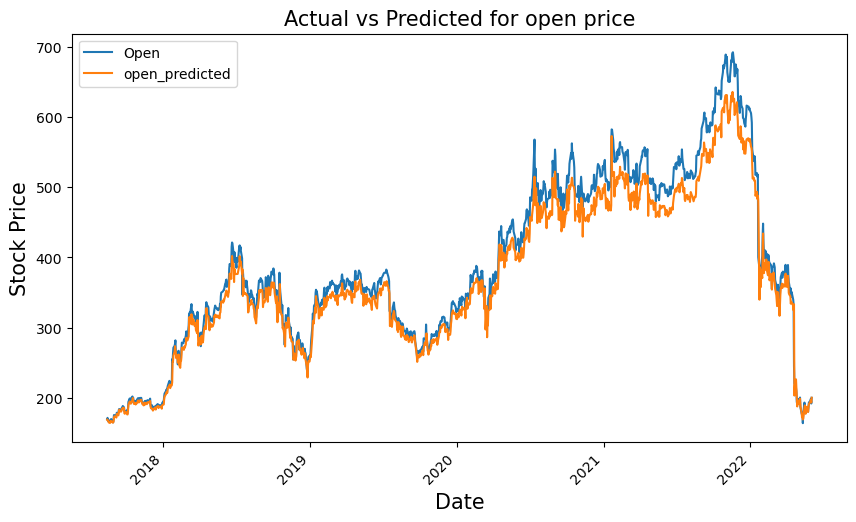

In [52]:
# plotting the actual open and predicted open prices on date index
df1[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

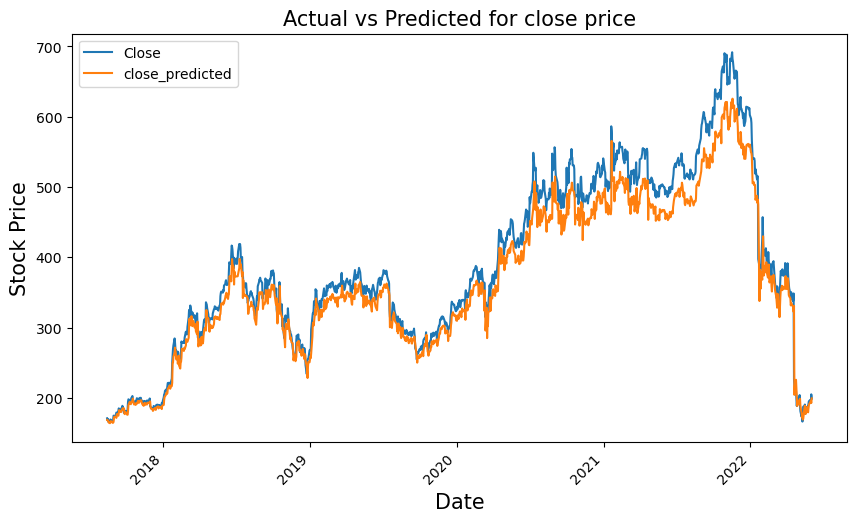

In [53]:
# plotting the actual close and predicted close prices on date index 
df1[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [54]:
df1

,Open,Close,open_predicted,close_predicted
Date,,,,
2017-08-14,169.800003,171.000000,169.070312,168.809128
2017-08-15,171.529999,168.500000,168.986130,168.749969
2017-08-16,167.500000,169.979996,167.578217,167.399063
2017-08-17,169.229996,166.089996,167.013367,166.835556
2017-08-18,165.949997,166.539993,165.032455,164.891403
...,...,...,...,...
2022-05-27,193.190002,195.190002,191.007111,190.355988
2022-05-31,196.179993,197.440002,195.095413,194.422195
2022-06-01,198.699997,192.910004,196.583603,195.909012


In [55]:
# Creating a dataframe and adding 10 days to existing index 

df2 = pd.concat([df1,pd.DataFrame(columns=df1.columns,
                                        index=pd.date_range(start=df1.index[-1], periods=11, freq='D'))],axis=0)
df2['2022-02-03':'2022-02-21']

,Open,Close,open_predicted,close_predicted
2022-02-03,421.440002,405.600006,400.850311,396.928497
2022-02-04,407.309998,410.170013,377.669525,374.134644
2022-02-07,410.170013,402.100006,392.054504,387.968475
2022-02-08,398.179993,403.529999,387.074921,383.029053
2022-02-09,408.649994,412.890015,382.674225,378.818420
2022-02-10,402.100006,406.269989,397.164612,393.054993
2022-02-11,405.329987,391.309998,383.310333,379.508026
2022-02-14,387.589996,396.570007,374.723083,371.212738
2022-02-15,403.790009,407.459991,376.068329,372.520935
2022-02-16,401.529999,398.079987,393.650360,389.738708


In [56]:
# creating a DataFrame and filling values of open and close column
forthcoming_prediction = pd.DataFrame(columns=['open','close'],index=df1.index)
forthcoming_prediction.index=pd.to_datetime(forthcoming_prediction.index)
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  forthcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 44ms/step


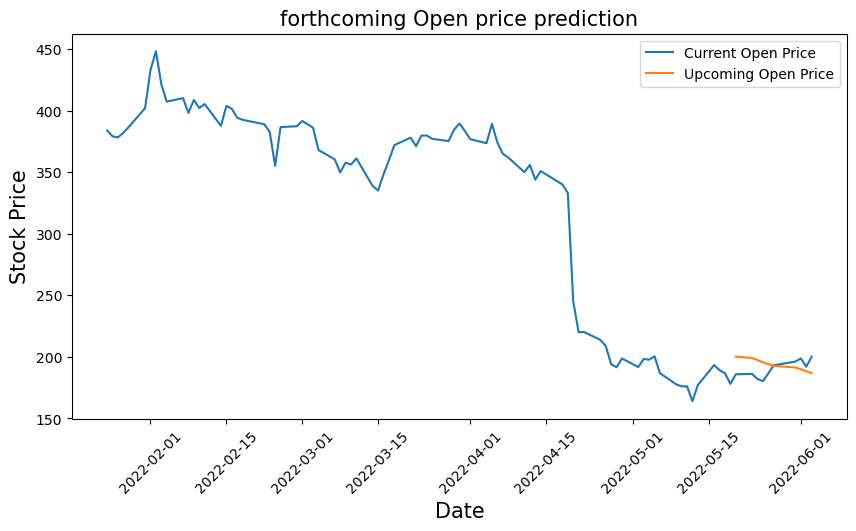

In [57]:
# inversing Normalization/scaling
forthcoming_prediction[['open','close']] = MMS.inverse_transform(forthcoming_prediction[['open','close']])
# plotting forthcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Open'],label='Current Open Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming Open price prediction',size=15)
ax.legend()
fig.show()

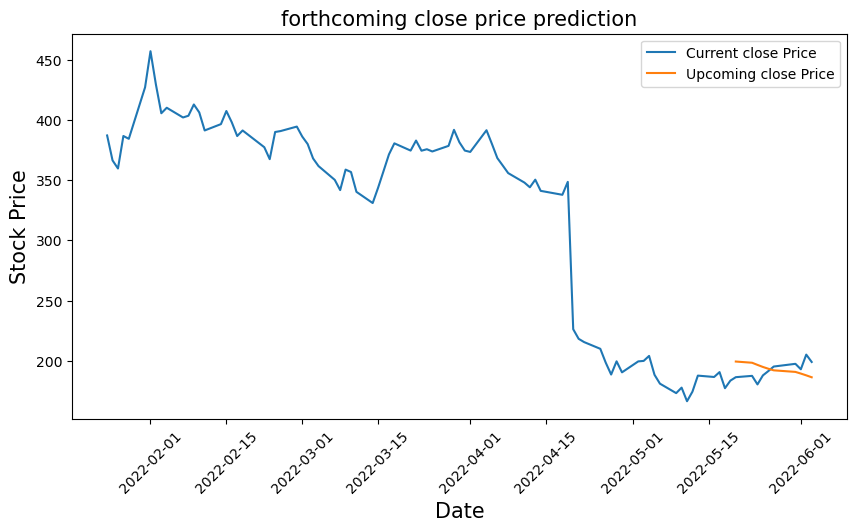

In [58]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming close price prediction',size=15)
ax.legend()
fig.show()